# Exploratory Data Analysis for: Astronomical Object Classification from The Sloan Digital Sky Survey Observations

## Load Data
* Read Data into pandas df
* Inspect the df size and columns

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

filename ='data/star_classification.csv'
sdss17_df_raw = pd.read_csv(filename)

num_rows = np.shape(sdss17_df_raw)[0]
num_cols = np.shape(sdss17_df_raw)[1]
print(f"DataFrame Initially has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

print(f"The Cols are:", end="\n\n")
print(sdss17_df_raw.dtypes)

DataFrame Initially has #Cols:100000 and #Rows:18

The Cols are:

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


## Removing an ID numbers and meta data - Spectroscopic Observations only

In [62]:
sdss17_df = sdss17_df_raw.drop(['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'spec_obj_ID', 'MJD', 'plate'], axis = 1)

## Remove problematic very bright objects not of interest (I suspect The Moon)

In [63]:
# Remove Very Bright Objects
sdss17_df_no_anomaly = sdss17_df[sdss17_df['u'] > -1]

num_rows = np.shape(sdss17_df_no_anomaly)[0]
num_cols = np.shape(sdss17_df_no_anomaly)[1]
print(f"DataFrame now has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')


DataFrame now has #Cols:99999 and #Rows:7



In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data

Classes = sdss17_df_no_anomaly['class'].unique()
 
redshift = sdss17_df_no_anomaly[['redshift', 'class']]

galaxy =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'GALAXY']
qso =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'QSO'] 
star =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'STAR']

colors = ['mediumslateblue', 'indianred', 'mediumaquamarine']

## Exploring the differences between Galaxies, QSOs and Stars

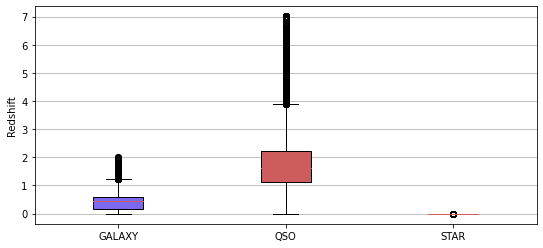

In [65]:
data = [galaxy['redshift'], qso['redshift'], star['redshift']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks
#ax1.set_title('Rectangular box plot')

# fill with colors


for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('Redshift')

plt.savefig('img/redshiftbox.png')
plt.show()


In [66]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder()
sdss17_df_no_anomaly["class"] = le.fit_transform(sdss17_df_no_anomaly["class"])
sdss17_df_no_anomaly["class"] = sdss17_df_no_anomaly["class"].astype(int)

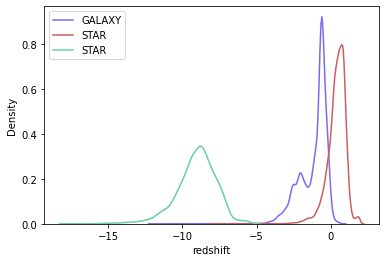

In [78]:


for i in range(3):
    sns.kdeplot(data=np.log(sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['redshift']), label = le.inverse_transform([i]), color=colors[i])
#sns.kdeplot(data=np.log(sdss17_df_no_sun['redshift']),label = ["All"])
Classes = ['GALAXY', 'STAR', 'STAR']
plt.legend(Classes)
plt.savefig('img/rdensity.png')

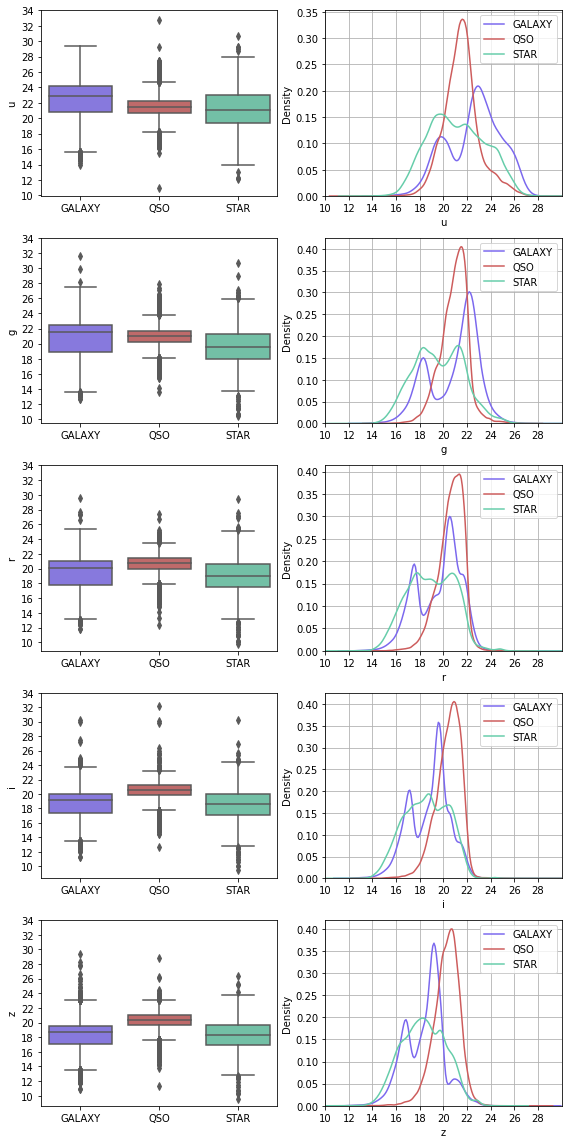

In [50]:
data = [galaxy['u'], qso['u'], star['u']]
from matplotlib.colors import to_rgba
colors = ['mediumslateblue', 'indianred', 'mediumaquamarine']

my_colors = [to_rgba(c) for c in colors]
  
sns.set_palette(my_colors)

def kde(feature, loc):
    for i in range(3):
        sns.kdeplot(ax=loc, data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i][feature], label = le.inverse_transform([i]), color=colors[i])
        loc.grid()
        loc.set_xlabel(feature)
        loc.set_xlim([10, 30])
        loc.set_xticks(np.arange(10, 30, 2))
        loc.legend(Classes)


def box(feature, loc):
    data = [galaxy[feature], qso[feature], star[feature]]
    #loc.boxplot(data, vert=True,  # vertical box alignment
                     #patch_artist=True,  # fill with color
                     #labels=Classes)  # will be used to label x-ticks
    sns.boxplot(ax=loc, data=data)
    loc.set_xticklabels(Classes)
    loc.set_yticks(np.arange(10, 36, 2))
    loc.set_ylabel(feature)
    #loc.grid(axis='y')
    #for patch, color in zip(loc['boxes'], colors):
        #patch.set_facecolor(color)

    
fig, ax = plt.subplots(5, 2, figsize=(8, 16))#, sharex='col')

kde('u', ax[0, 1])
box('u', ax[0, 0])
kde('g', ax[1, 1])
box('g', ax[1, 0])
kde('r', ax[2, 1])
box('r', ax[2, 0])
kde('i', ax[3, 1])
box('i', ax[3, 0])
kde('z', ax[4, 1])
box('z', ax[4, 0])
plt.tight_layout()
plt.savefig('img/omnifilter.png')

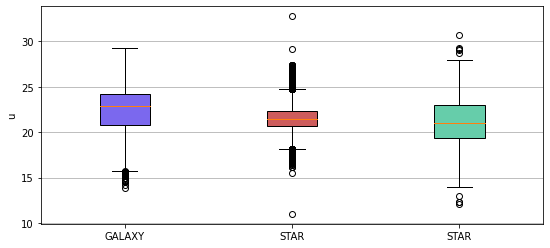

In [28]:

data = [galaxy['u'], qso['u'], star['u']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('u')

plt.savefig('img/ubox.png')
plt.show()

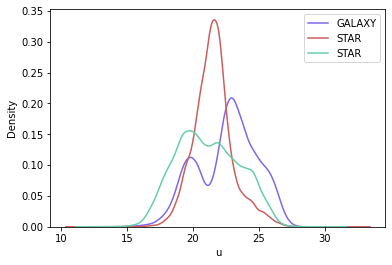

In [29]:

for i in range(3):
    sns.kdeplot(data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['u'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes)
plt.savefig('img/udensity.png')

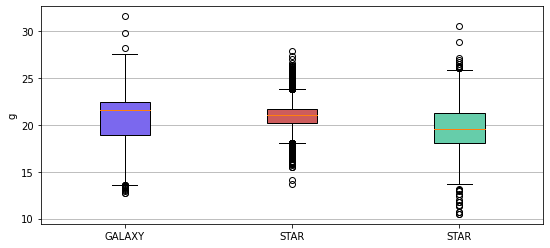

In [30]:
data = [galaxy['g'], qso['g'], star['g']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('g')

plt.savefig('img/gbox.png')
plt.show()

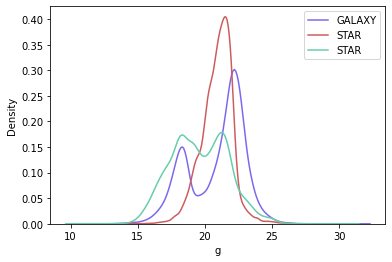

In [31]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['g'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes)
plt.savefig('img/gdensity.png')

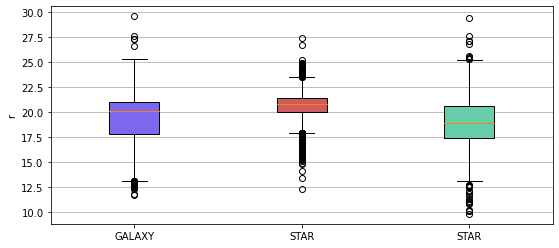

In [32]:
data = [galaxy['r'], qso['r'], star['r']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('r')

plt.savefig('img/rbox.png')
plt.show()

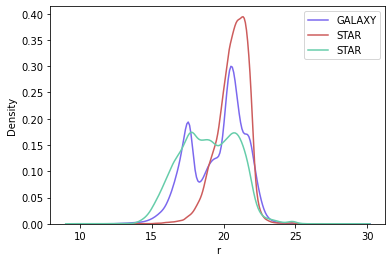

In [33]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['r'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes)
plt.savefig('img/rdensity.png')

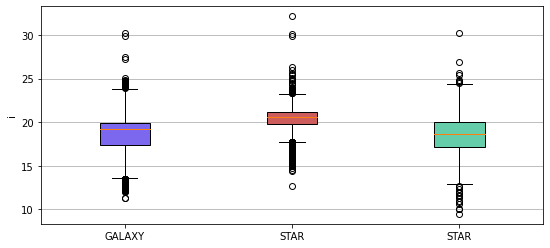

In [34]:
data = [galaxy['i'], qso['i'], star['i']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('i')

plt.savefig('img/ibox.png')
plt.show()

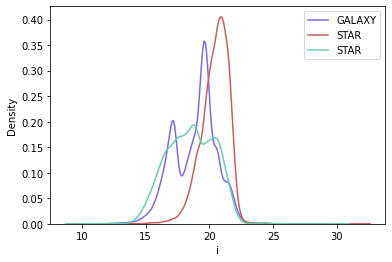

In [35]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['i'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes)
plt.savefig('img/idensity.png')

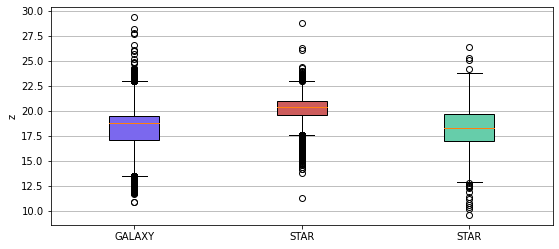

In [36]:

data = [galaxy['z'], qso['z'], star['z']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('z')

plt.savefig('img/zbox.png')
plt.show()

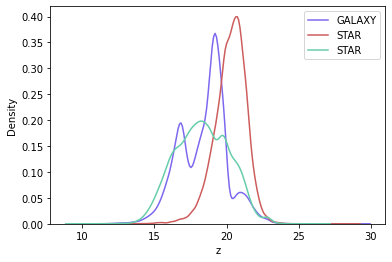

In [37]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_anomaly[sdss17_df_no_anomaly["class"] == i]['z'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes)
plt.savefig('img/zdensity.png')

### Separate the features from the class variable

In [67]:
sdss17_features = sdss17_df_no_anomaly.drop('class', axis=1, inplace=False)
sdss17_class_categorical = sdss17_df_no_anomaly['class']
classes = sdss17_class_categorical.unique() # redundant - should be created earlier

print(sdss17_features.columns)
print(sdss17_class_categorical)

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 99999, dtype: int64


In [68]:
sdss17_class_categorical.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Train test split
* 67% 33% Train Test split

In [69]:

X_train, X_test, y_train, y_test = train_test_split(
    sdss17_features,
    sdss17_class_categorical,
    test_size=0.33,
    random_state=1000)

In [70]:
print(y_train)

92305    2
1527     0
97404    0
38370    2
85950    0
        ..
58716    0
18782    0
3776     2
71751    0
70231    2
Name: class, Length: 66999, dtype: int64


Size of Training set (66999) + Size of Testing set (33000) = 99999 = Size of Original Set (99999)


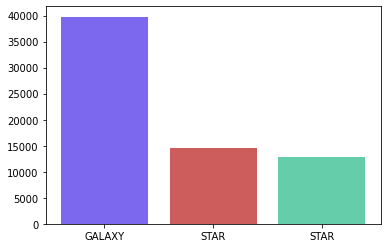

In [80]:
class_frequency = y_train.value_counts()

print(f"Size of Training set ({len(X_train)}) + Size of Testing set ({len(X_test)}) = {len(X_train) + len(X_test)} = Size of Original Set ({num_rows})")

color = ['mediumslateblue', 'indianred', 'mediumaquamarine']
plt.bar(classes, class_frequency, color=color, tick_label=Classes)
#plt.savefig('img/trainclassimbalance.png')
plt.show()

The Class distribution is imbalanced. A classifer model will be biased toward the Class that is most frequent.

## Class Balancing with SMOTE

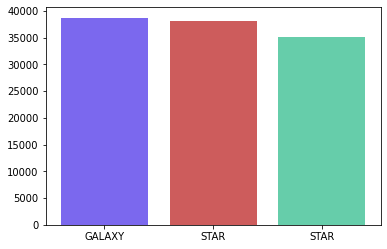

In [84]:
from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTE

smote = SMOTEENN(random_state=1000) # added sampling_strategy

X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train)

class_frequency = y_train_balance.value_counts()

plt.bar(classes, class_frequency, color=color, tick_label=Classes)
#plt.savefig('img/trainbalance.png')
plt.show()

## Saving the files DFs as CSV

In [85]:
X_train_balance.to_csv('data/ClassBalanced/xtrain.csv', index=False)
y_train_balance.to_csv('data/ClassBalanced/ytrain.csv', index=False)
X_test.to_csv('data/xtest.csv', index=False)
y_test.to_csv('data/ytest.csv', index=False) # not class balanced

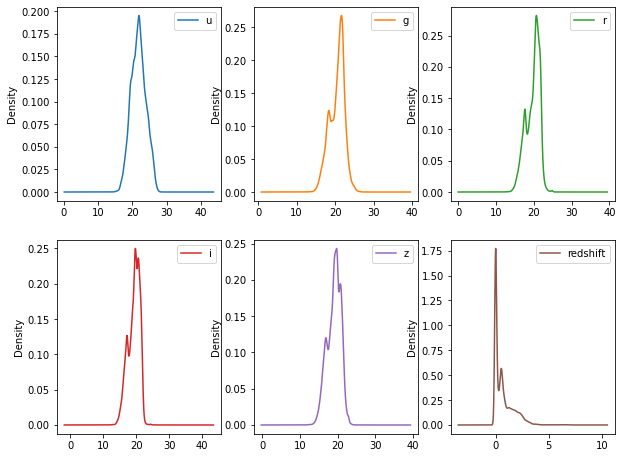

In [22]:
X_train_balance.plot(kind='density',
                     subplots=True,
                     layout=(6,3),
                     sharex=False,
                     figsize=(10, 25))
plt.show()

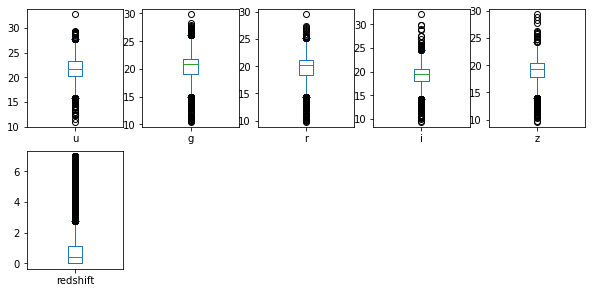

In [23]:
X_train_balance.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(10,10))
plt.show()

Get the scatterplots for just a few features to demonstrate the complexity of the relationship between variables

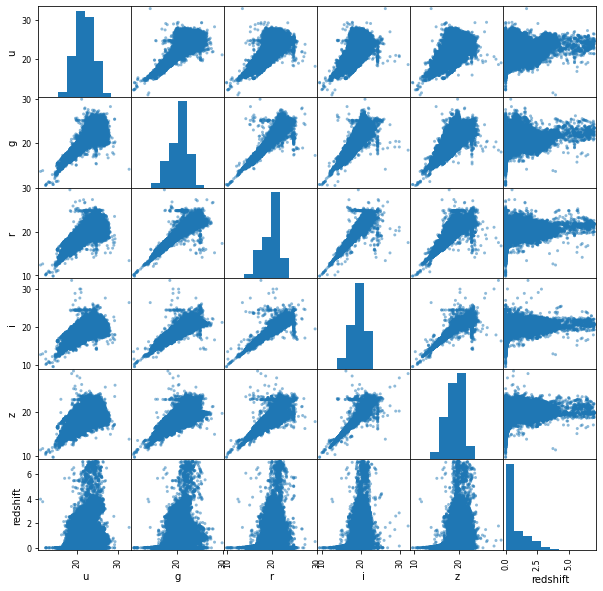

In [28]:
scatter_matrix(X_train_balance, figsize=[10,10])
plt.savefig('img/scattermatrix.png')
plt.show()

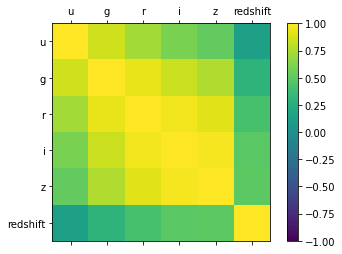

In [29]:
corr = X_train_balance.corr()
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,6,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(['u', 'g', 'r', 'i', 'z', 'redshift']) 
ax.set_yticklabels(['u', 'g', 'r', 'i', 'z', 'redshift'])
plt.savefig('img/corrmatrix.png')
plt.show()